c:\Users\Rifkhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Rifkhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


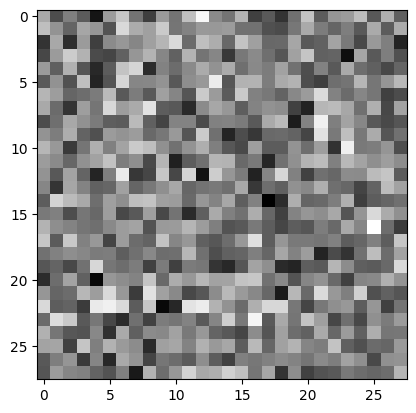

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Sequential

# Define the generator model
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

# Instantiate and compile the generator
generator = build_generator()
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Generate a random noise vector
noise = tf.random.normal([1, 100])

# Generate a new face
generated_image = generator.predict(noise)

# Display the generated face
import matplotlib.pyplot as plt
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.show()
